# CG SENSE Reconstruction Demo
This notebook goes through examples of reconstruction methods with riesling using the data from the reproducibility challenge using CG-SENSE.

To run these examples you need to have the challenge data downloaded, check the `README.md` for instructions

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [90]:
def plot2d(nii, vmin=None, vmax=None, title=None):
    I = np.squeeze(abs(nib.load(nii).get_fdata(dtype=np.complex64)))
    plt.imshow(np.rot90(I,2), cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.title(title)
    return I

In [91]:
mkdir demo_recon

mkdir: cannot create directory ‘demo_recon’: File exists


In [92]:
ries_brain_h5 = 'riesling_data/riesling_rawdata_brain_radial_96proj_12ch'
base_args = "--fov=234 --stack --os 2.5"

## RSS Recon
The simples reconstruction we can do is RSS recon

In [93]:
!riesling rss {base_args} -o demo_recon/brain {ries_brain_h5}.h5
!riesling rss {base_args} --sdc -o demo_recon/brain_sdc {ries_brain_h5}.h5

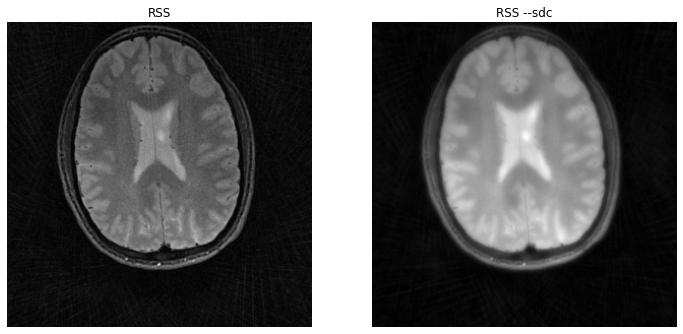

In [94]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plot2d('demo_recon/brain-rss.nii', title='RSS');

fig.add_subplot(1,2,2)
plot2d('demo_recon/brain_sdc-rss.nii', title='RSS --sdc');
plt.show()

## CG-SENSE

In [95]:
!riesling cg -i 10 {base_args} --kb -o demo_recon/brain {ries_brain_h5}.h5
!riesling cg -i 10 {base_args} --kb --sdc -o demo_recon/brain_sdc {ries_brain_h5}.h5

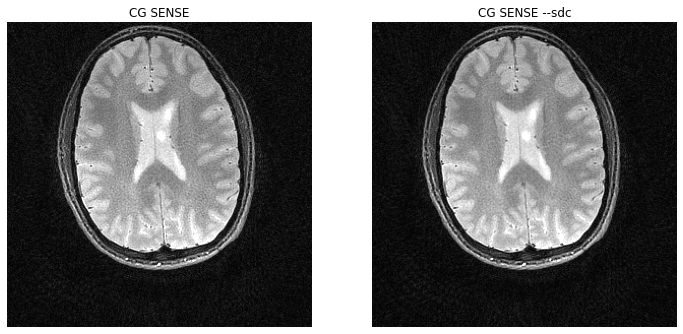

In [96]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plot2d('demo_recon/brain-cg.nii', title='CG SENSE', vmin=0, vmax=3E-4);
fig.add_subplot(1,2,2)
plot2d('demo_recon/brain_sdc-cg.nii', title='CG SENSE --sdc', vmin=0, vmax=3E-4);
plt.show()

## TGV

In [97]:
!riesling tgv -i 30 {base_args} -o demo_recon/brain {ries_brain_h5}.h5
!riesling tgv -i 30 {base_args} --sdc -o demo_recon/brain_sdc {ries_brain_h5}.h5

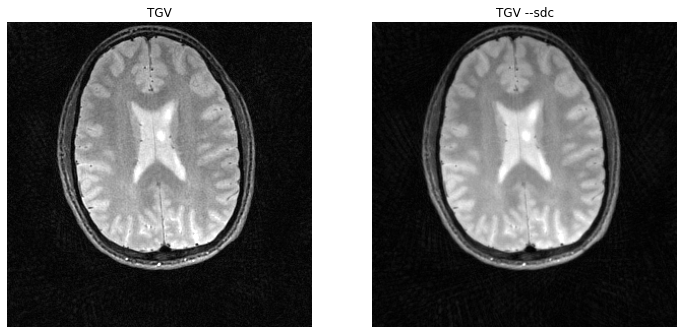

In [98]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plot2d('demo_recon/brain-tgv.nii', title='TGV', vmin=0, vmax=3E-4);
fig.add_subplot(1,2,2)
plot2d('demo_recon/brain_sdc-tgv.nii', title='TGV --sdc', vmin=0, vmax=3E-4);
plt.show()